<a href="https://colab.research.google.com/github/09aryan/MEME_CLASSIFICATION_USING_SENTIMENT_ANALYSIS/blob/main/resNet2Test1(test%26train).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


Epoch 1/50
45/45 [==============================] - 2s 9ms/step - loss: 1.6000 - accuracy: 0.2525 - val_loss: 1.5922 - val_accuracy: 0.3453
Epoch 2/50
45/45 [==============================] - 0s 6ms/step - loss: 1.5862 - accuracy: 0.3243 - val_loss: 1.5783 - val_accuracy: 0.4350
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 1.5715 - accuracy: 0.3954 - val_loss: 1.5635 - val_accuracy: 0.4350
Epoch 4/50
45/45 [==============================] - 0s 6ms/step - loss: 1.5564 - accuracy: 0.4115 - val_loss: 1.5488 - val_accuracy: 0.4350
Epoch 5/50
45/45 [==============================] - 0s 5ms/step - loss: 1.5415 - accuracy: 0.4259 - val_loss: 1.5335 - val_accuracy: 0.4350
Epoch 6/50
45/45 [==============================] - 0s 6ms/step - loss: 1.5248 - accuracy: 0.4382 - val_loss: 1.5179 - val_accuracy: 0.4350
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 1.5085 - accuracy: 0.4380 - val_loss: 1.5028 - val_accuracy: 0.4350
Epoch 8/50
45/45 [==

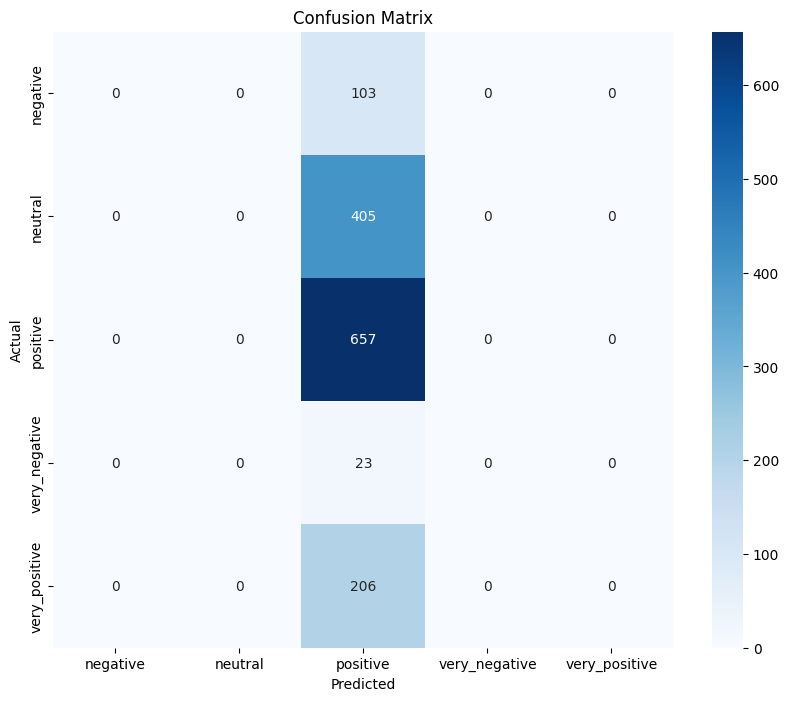

Classification Report:
               precision    recall  f1-score   support

     negative       0.00      0.00      0.00       103
      neutral       0.00      0.00      0.00       405
     positive       0.47      1.00      0.64       657
very_negative       0.00      0.00      0.00        23
very_positive       0.00      0.00      0.00       206

     accuracy                           0.47      1394
    macro avg       0.09      0.20      0.13      1394
 weighted avg       0.22      0.47      0.30      1394

F1 Score: 0.3019
Precision: 0.2221
Recall: 0.4713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
df = pd.read_csv('/content/drive/MyDrive/combined_data.csv')

# Preprocess the sentiment labels for multi-class classification
le = LabelEncoder()
df['overall_sentiment'] = le.fit_transform(df['overall_sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['Features'].apply(eval).values), df['overall_sentiment'].values, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a sentiment analysis model for multi-class classification
num_classes = len(le.classes_)
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=100, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(X_test_scaled, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:")
print(class_report)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")


Random Forest Test Accuracy: 29.27%


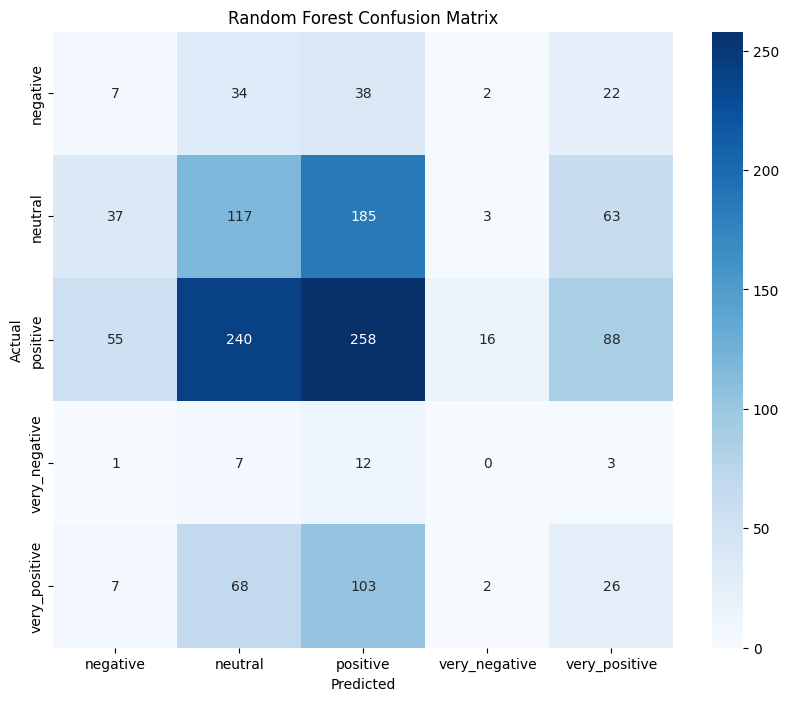

Random Forest Classification Report:
               precision    recall  f1-score   support

     negative       0.07      0.07      0.07       103
      neutral       0.25      0.29      0.27       405
     positive       0.43      0.39      0.41       657
very_negative       0.00      0.00      0.00        23
very_positive       0.13      0.13      0.13       206

     accuracy                           0.29      1394
    macro avg       0.18      0.18      0.17      1394
 weighted avg       0.30      0.29      0.30      1394

Random Forest F1 Score: 0.2959
Random Forest Precision: 0.3008
Random Forest Recall: 0.2927


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf, target_names=le.classes_)
print("Random Forest Classification Report:")
print(class_report_rf)

# F1 Score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {f1_rf:.4f}")

# Precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest Precision: {precision_rf:.4f}")

# Recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest Recall: {recall_rf:.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, Flatten, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the combined dataset
df = pd.read_csv('/content/drive/MyDrive/combined_data.csv')

# Preprocess the sentiment labels for multi-class classification
le = LabelEncoder()
df['overall_sentiment'] = le.fit_transform(df['overall_sentiment'])

# Handle missing values in 'text_corrected'
df['text_corrected'].fillna('', inplace=True)

# Tokenize the text data
max_words = 10000  # Adjust based on your dataset
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text_corrected'])
text_sequences = tokenizer.texts_to_sequences(df['text_corrected'])
text_padded = pad_sequences(text_sequences)

# Combine InceptionV3 features with text-based features
X_text = text_padded
X_features = np.vstack(df['Features'].apply(eval).values)
X_combined = np.hstack((X_text, X_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['overall_sentiment'].values, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a combined model for multi-class classification
num_classes = len(le.classes_)

# Text branch
text_input = Input(shape=(X_text.shape[1],))
embedding_layer = Embedding(input_dim=max_words, output_dim=128)(text_input)
flatten_layer = Flatten()(embedding_layer)

# Features branch
features_input = Input(shape=(X_features.shape[1],))

# Concatenate both branches
merged = concatenate([flatten_layer, features_input])

# Dense layers
dense_1 = Dense(512, activation='relu')(merged)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(dense_2)
dense_3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.2)(dense_3)
output_layer = Dense(num_classes, activation='softmax')(dropout_3)

# Create the model
model = Model(inputs=[text_input, features_input], outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_train[:, :X_text.shape[1]], X_train[:, X_text.shape[1]:]], y_train, epochs=50, batch_size=100, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate([X_test[:, :X_text.shape[1]], X_test[:, X_text.shape[1]:]], y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
45/45 [==============================] - 29s 576ms/step - loss: 1.4615 - accuracy: 0.3781 - val_loss: 1.3567 - val_accuracy: 0.4350
Epoch 2/50
45/45 [==============================] - 24s 533ms/step - loss: 1.3391 - accuracy: 0.4109 - val_loss: 1.3217 - val_accuracy: 0.4350
Epoch 3/50
45/45 [==============================] - 25s 552ms/step - loss: 1.3167 - accuracy: 0.4088 - val_loss: 1.3095 - val_accuracy: 0.4350
Epoch 4/50
45/45 [==============================] - 23s 513ms/step - loss: 1.3103 - accuracy: 0.4198 - val_loss: 1.3056 - val_accuracy: 0.4350
Epoch 5/50
45/45 [==============================] - 29s 652ms/step - loss: 1.3079 - accuracy: 0.4151 - val_loss: 1.3059 - val_accuracy: 0.4350
Epoch 6/50
45/45 [==============================] - 23s 513ms/step - loss: 1.3071 - accuracy: 0.4109 - val_loss: 1.3051 - val_accuracy: 0.4350
Epoch 7/50
45/45 [==============================] - 26s 588ms/step - loss: 1.3062 - accuracy: 0.4207 - val_loss: 1.3044 - val_accuracy: 0.4350

MLP Test Accuracy: 47.13%


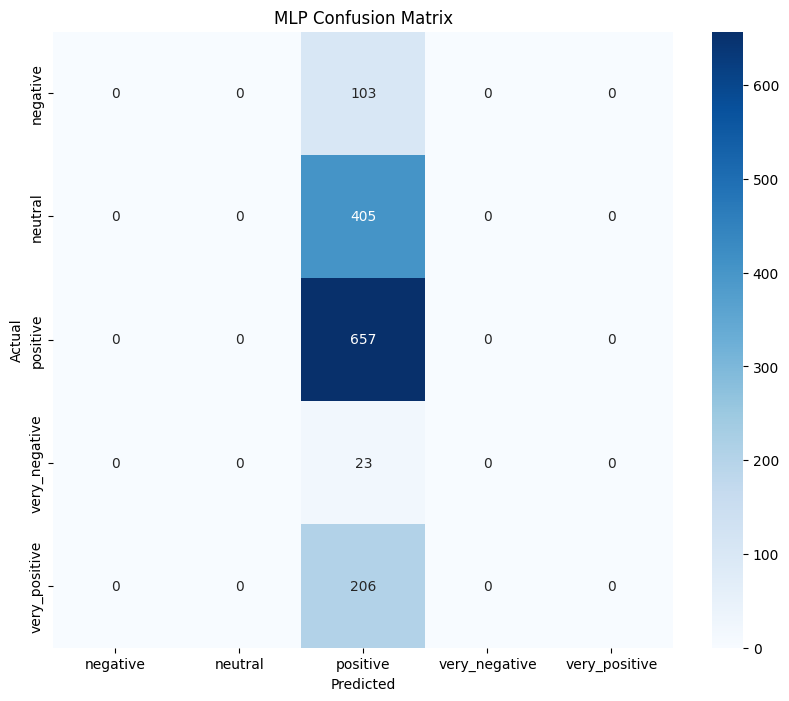

MLP Classification Report:
               precision    recall  f1-score   support

     negative       0.00      0.00      0.00       103
      neutral       0.00      0.00      0.00       405
     positive       0.47      1.00      0.64       657
very_negative       0.00      0.00      0.00        23
very_positive       0.00      0.00      0.00       206

     accuracy                           0.47      1394
    macro avg       0.09      0.20      0.13      1394
 weighted avg       0.22      0.47      0.30      1394

MLP F1 Score: 0.3019
MLP Precision: 0.2221
MLP Recall: 0.4713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=1000, random_state=42)

# Train the MLP model
mlp_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test_scaled)

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Test Accuracy: {accuracy_mlp * 100:.2f}%")

# Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

# Classification Report
class_report_mlp = classification_report(y_test, y_pred_mlp, target_names=le.classes_)
print("MLP Classification Report:")
print(class_report_mlp)

# F1 Score
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
print(f"MLP F1 Score: {f1_mlp:.4f}")

# Precision
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
print(f"MLP Precision: {precision_mlp:.4f}")

# Recall
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
print(f"MLP Recall: {recall_mlp:.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Input,
    Embedding,
    Flatten,
    concatenate,
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the combined dataset
df = pd.read_csv('/content/drive/MyDrive/combined_data.csv')

# Preprocess the sentiment labels for multi-class classification
le = LabelEncoder()
df['overall_sentiment'] = le.fit_transform(df['overall_sentiment'])

# Handle missing values in 'text_corrected'
df['text_corrected'].fillna('', inplace=True)

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text_corrected'])
text_sequences = tokenizer.texts_to_sequences(df['text_corrected'])
text_padded = pad_sequences(text_sequences)

# Combine InceptionV3 features with text-based features
X_text = text_padded
X_features = np.vstack(df['Features'].apply(eval).values)
X_combined = np.hstack((X_text, X_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, df['overall_sentiment'].values, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data augmentation for text data
datagen_text = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Build a combined model for multi-class classification
num_classes = len(le.classes_)

# Text branch
text_input = Input(shape=(X_text.shape[1],))
embedding_layer = Embedding(input_dim=max_words, output_dim=128)(text_input)
flatten_layer = Flatten()(embedding_layer)

# Features branch
features_input = Input(shape=(X_features.shape[1],))

# Concatenate both branches
merged = concatenate([flatten_layer, features_input])

# Dense layers with increased complexity
dense_1 = Dense(512, activation='relu')(merged)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(256, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(dense_2)
dense_3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.2)(dense_3)
output_layer = Dense(num_classes, activation='softmax')(dropout_3)

# Create the model
model = Model(inputs=[text_input, features_input], outputs=output_layer)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# Train the model with data augmentation
history = model.fit(
    [X_train[:, : X_text.shape[1]], X_train[:, X_text.shape[1]:]],
    y_train,
    epochs=100,
    batch_size=64,  # Experiment with batch size
    validation_split=0.2,
    callbacks=[early_stopping],
)

# Evaluate the model
accuracy = model.evaluate(
    [X_test[:, : X_text.shape[1]], X_test[:, X_text.shape[1]:]], y_test
)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100
70/70 [==============================] - 38s 515ms/step - loss: 1.3420 - accuracy: 0.4079 - val_loss: 1.3087 - val_accuracy: 0.4350
Epoch 2/100
70/70 [==============================] - 33s 470ms/step - loss: 1.3018 - accuracy: 0.4209 - val_loss: 1.3005 - val_accuracy: 0.4350
Epoch 3/100
70/70 [==============================] - 30s 424ms/step - loss: 1.2996 - accuracy: 0.4207 - val_loss: 1.3022 - val_accuracy: 0.4350
Epoch 4/100
70/70 [==============================] - 32s 459ms/step - loss: 1.2956 - accuracy: 0.4279 - val_loss: 1.2993 - val_accuracy: 0.4350
Epoch 5/100
70/70 [==============================] - 32s 465ms/step - loss: 1.2886 - accuracy: 0.4297 - val_loss: 1.3002 - val_accuracy: 0.4350
Epoch 6/100
70/70 [==============================] - 33s 468ms/step - loss: 1.2876 - accuracy: 0.4333 - val_loss: 1.3050 - val_accuracy: 0.4350
Epoch 7/100
70/70 [==============================] - 31s 444ms/step - loss: 1.2871 - accuracy: 0.4288 - val_loss: 1.2979 - val_accuracy:

In [ ]:
import pandas as pd

# Load the CSV files into pandas DataFrames
labels_df = pd.read_csv('/content/drive/MyDrive/labels.csv')
image_data_df = pd.read_csv('/content/drive/MyDrive/image_data_fine_tuned.csv')

# Merge the DataFrames based on the 'image_name' and 'ImageName' columns
combined_df = pd.merge(labels_df, image_data_df, left_on='image_name', right_on='ImageName', how='inner')

# Select only the columns of interest
result_df = combined_df[['image_name', 'text_ocr', 'text_corrected', 'overall_sentiment', 'Features']]

# Save the result to a new CSV file
result_df.to_csv('/content/drive/MyDrive/combined_data2.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the combined dataset
df = pd.read_csv('/content/drive/MyDrive/combined_data2.csv')

# Preprocess the sentiment labels for multi-class classification
le = LabelEncoder()
df['overall_sentiment'] = le.fit_transform(df['overall_sentiment'])

# Split the dataset into features (X) and labels (y)
X = np.vstack(df['Features'].apply(eval).values)
y = df['overall_sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a sentiment analysis model for multi-class classification
num_classes = len(le.classes_)
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to one-hot encoding for multi-class classification
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Train the model
model.fit(X_train_scaled, y_train_one_hot, epochs=50, batch_size=100, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(X_test_scaled, y_test_one_hot)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
45/45 [==============================] - 3s 43ms/step - loss: 1.5937 - accuracy: 0.3068 - val_loss: 1.5913 - val_accuracy: 0.4350
Epoch 2/50
45/45 [==============================] - 1s 28ms/step - loss: 1.5828 - accuracy: 0.3653 - val_loss: 1.5802 - val_accuracy: 0.4350
Epoch 3/50
45/45 [==============================] - 1s 20ms/step - loss: 1.5716 - accuracy: 0.4122 - val_loss: 1.5690 - val_accuracy: 0.4350
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 1.5593 - accuracy: 0.4277 - val_loss: 1.5571 - val_accuracy: 0.4350
Epoch 5/50
45/45 [==============================] - 1s 19ms/step - loss: 1.5472 - accuracy: 0.4351 - val_loss: 1.5442 - val_accuracy: 0.4350
Epoch 6/50
45/45 [==============================] - 1s 19ms/step - loss: 1.5329 - accuracy: 0.4389 - val_loss: 1.5304 - val_accuracy: 0.4350
Epoch 7/50
45/45 [==============================] - 1s 20ms/step - loss: 1.5187 - accuracy: 0.4355 - val_loss: 1.5165 - val_accuracy: 0.4350
Epoch 8/50
45

In [ ]:
!pip install pandas tensorflow transformers scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.optimizers import Adam

# Load your dataset
# df = pd.read_csv('/path/to/your/meme_dataset.csv')

# Preprocess the sentiment labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['overall_sentiment'])

# Fill NaN values in the 'text_corrected' column with an empty string
df['text_corrected'].fillna('', inplace=True)

# Frequency encode the text features
vectorizer = CountVectorizer()
text_features = vectorizer.fit_transform(df['text_corrected']).toarray()

# Concatenate text features with numerical features
combined_features = np.hstack((text_features, np.vstack(df['Features'].apply(eval).values)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, df['label'].values, test_size=0.2, random_state=42)

# Build a neural network model
model = Sequential([
    Input(shape=(combined_features.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
140/140 [==============================] - 23s 155ms/step - loss: 1.3208 - accuracy: 0.4353 - val_loss: 1.3293 - val_accuracy: 0.3220
Epoch 2/10
140/140 [==============================] - 18s 130ms/step - loss: 0.9682 - accuracy: 0.5898 - val_loss: 1.6018 - val_accuracy: 0.3614
Epoch 3/10
140/140 [==============================] - 18s 131ms/step - loss: 0.3210 - accuracy: 0.8906 - val_loss: 2.4049 - val_accuracy: 0.3372
Epoch 4/10
140/140 [==============================] - 18s 130ms/step - loss: 0.0902 - accuracy: 0.9751 - val_loss: 3.0705 - val_accuracy: 0.3345
Epoch 5/10
140/140 [==============================] - 22s 161ms/step - loss: 0.0544 - accuracy: 0.9850 - val_loss: 2.9245 - val_accuracy: 0.3291
Epoch 6/10
140/140 [==============================] - 18s 127ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 3.4630 - val_accuracy: 0.3408
Epoch 7/10
140/140 [==============================] - 18s 128ms/step - loss: 0.0162 - accuracy: 0.9942 - val_loss: 3.9009 - val_ac

In [ ]:
train_accuracy = history.history['accuracy'][-1]  # Get the last accuracy from the training history

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 44.23%
Test Accuracy: 38.38%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.optimizers import Adam

# Load your dataset
# df = pd.read_csv('/path/to/your/meme_dataset.csv')

# Preprocess the sentiment labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['overall_sentiment'])

# Fill NaN values in the 'text_corrected' column with an empty string
df['text_corrected'].fillna('', inplace=True)

# Frequency encode the text features
vectorizer = CountVectorizer()
text_features = vectorizer.fit_transform(df['text_corrected']).toarray()

# Concatenate text features with numerical features
combined_features = np.hstack((text_features, np.vstack(df['Features'].apply(eval).values)))

# Convert labels to numpy array
labels = df['label'].values

# Number of folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Loop over folds
for fold, (train_index, val_index) in enumerate(skf.split(combined_features, labels)):
    print(f"\nFold {fold + 1}/{k_folds}")

    # Split data into train and validation sets
    X_train, X_val = combined_features[train_index], combined_features[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Build a neural network model
    model = Sequential([
        Input(shape=(combined_features.shape[1],)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(len(le.classes_), activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")



Fold 1/5
Epoch 1/10
175/175 [==============================] - 30s 166ms/step - loss: 1.3151 - accuracy: 0.4444 - val_loss: 1.2887 - val_accuracy: 0.4462
Epoch 2/10
175/175 [==============================] - 26s 147ms/step - loss: 0.9993 - accuracy: 0.5655 - val_loss: 1.5271 - val_accuracy: 0.3723
Epoch 3/10
175/175 [==============================] - 25s 145ms/step - loss: 0.3721 - accuracy: 0.8744 - val_loss: 2.1575 - val_accuracy: 0.3558
Epoch 4/10
175/175 [==============================] - 23s 133ms/step - loss: 0.1147 - accuracy: 0.9684 - val_loss: 2.8204 - val_accuracy: 0.3874
Epoch 5/10
175/175 [==============================] - 27s 153ms/step - loss: 0.0622 - accuracy: 0.9822 - val_loss: 2.8361 - val_accuracy: 0.3515
Epoch 6/10
175/175 [==============================] - 26s 148ms/step - loss: 0.0387 - accuracy: 0.9869 - val_loss: 3.1291 - val_accuracy: 0.3565
Epoch 7/10
175/175 [==============================] - 26s 146ms/step - loss: 0.0286 - accuracy: 0.9891 - val_loss: 3.331

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import accuracy_score
from ast import literal_eval

# Load the dataset
csv_file_path = '/content/drive/MyDrive/combined_data2_mapped.csv'
df = pd.read_csv(csv_file_path)

# Convert string representations of lists to actual lists
df['Features'] = df['Features'].apply(literal_eval)

# Extract features
X = np.vstack(df['Features'])
y_positive = df['positive'].values
y_negative = df['negative'].values

# Create the new target variable y_neutral
y_neutral = np.where((y_positive == 0) & (y_negative == 0), 1, 0)

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train_positive, y_test_positive, y_train_negative, y_test_negative, y_train_neutral, y_test_neutral = train_test_split(
    X, y_positive, y_negative, y_neutral, test_size=0.2, random_state=42
)

# Define a simple model
def simple_model(input_dim, dropout_rate=0.1):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Use sigmoid for binary classification
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build and compile the positive sentiment model
model_positive = simple_model(input_dim=X_train.shape[1])
model_positive.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the positive sentiment model
model_positive.fit(X_train, y_train_positive, epochs=100, batch_size=2, validation_split=0.2)

# Evaluate the positive sentiment model
test_pred_positive = model_positive.predict(X_test)
test_accuracy_positive = accuracy_score(y_test_positive, (test_pred_positive > 0.5).astype(int))
print(f"Positive Sentiment Model - Test Accuracy: {test_accuracy_positive}")

# Build and compile the negative sentiment model
model_negative = simple_model(input_dim=X_train.shape[1])
model_negative.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the negative sentiment model
model_negative.fit(X_train, y_train_negative, epochs=100, batch_size=2, validation_split=0.2)

# Evaluate the negative sentiment model
test_pred_negative = model_negative.predict(X_test)
test_accuracy_negative = accuracy_score(y_test_negative, (test_pred_negative > 0.5).astype(int))
print(f"Negative Sentiment Model - Test Accuracy: {test_accuracy_negative}")

# Build and compile the neutral sentiment model
model_neutral = simple_model(input_dim=X_train.shape[1])
model_neutral.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the neutral sentiment model
model_neutral.fit(X_train, y_train_neutral, epochs=100, batch_size=2, validation_split=0.2)

# Evaluate the neutral sentiment model
test_pred_neutral = model_neutral.predict(X_test)
test_accuracy_neutral = accuracy_score(y_test_neutral, (test_pred_neutral > 0.5).astype(int))
print(f"Neutral Sentiment Model - Test Accuracy: {test_accuracy_neutral}")


Epoch 1/100
2230/2230 [==============================] - 7s 3ms/step - loss: -167.3957 - accuracy: 0.3234 - val_loss: -596.3799 - val_accuracy: 0.3112
Epoch 2/100
2230/2230 [==============================] - 7s 3ms/step - loss: -2319.4468 - accuracy: 0.3234 - val_loss: -4171.0386 - val_accuracy: 0.3112
Epoch 3/100
2230/2230 [==============================] - 5s 2ms/step - loss: -8442.7227 - accuracy: 0.3234 - val_loss: -11658.2852 - val_accuracy: 0.3112
Epoch 4/100
2230/2230 [==============================] - 5s 2ms/step - loss: -19465.8906 - accuracy: 0.3234 - val_loss: -24158.6465 - val_accuracy: 0.3112
Epoch 5/100
2230/2230 [==============================] - 7s 3ms/step - loss: -36451.3633 - accuracy: 0.3234 - val_loss: -42176.5039 - val_accuracy: 0.3112
Epoch 6/100
2230/2230 [==============================] - 5s 2ms/step - loss: -59784.0156 - accuracy: 0.3234 - val_loss: -66818.6328 - val_accuracy: 0.3112
Epoch 7/100
2230/2230 [==============================] - 5s 2ms/step - loss: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import accuracy_score
from ast import literal_eval

# Load the dataset
csv_file_path = '/content/drive/MyDrive/combined_data2_updated.csv'
df = pd.read_csv(csv_file_path)

# Convert string representations of lists to actual lists
df['Features'] = df['Features'].apply(literal_eval)

# Extract features
X = np.vstack(df['Features'])
y_very_positive = df['very_positive'].values
y_positive = df['positive'].values
y_negative = df['negative'].values
y_very_negative = df['very_negative'].values

# Create the new target variable y_neutral
y_neutral = np.where((y_very_positive == 0) & (y_positive == 0) & (y_negative == 0) & (y_very_negative == 0), 1, 0)

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train_very_positive, y_test_very_positive, y_train_positive, y_test_positive, y_train_negative, y_test_negative, y_train_very_negative, y_test_very_negative, y_train_neutral, y_test_neutral = train_test_split(
    X, y_very_positive, y_positive, y_negative, y_very_negative, y_neutral, test_size=0.2, random_state=42
)

# Define a multi-class model
def multi_class_model(input_dim, num_classes, dropout_rate=0.1):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Use softmax for multi-class classification
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build and compile the multi-class model
num_classes = 5  # Number of classes: very_positive, positive, negative, very_negative, neutral
model_multi_class = multi_class_model(input_dim=X_train.shape[1], num_classes=num_classes)
model_multi_class.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the multi-class model
model_multi_class.fit(X_train, y_train_very_positive, epochs=100, batch_size=2, validation_split=0.2)

# Evaluate the multi-class model
test_pred_multi_class = model_multi_class.predict(X_test)
test_accuracy_multi_class = accuracy_score(np.argmax(test_pred_multi_class, axis=1), y_test_very_positive)
print(f"Multi-Class Model - Test Accuracy: {test_accuracy_multi_class}")


Epoch 1/100
2230/2230 [==============================] - 13s 5ms/step - loss: 0.4713 - accuracy: 0.8511 - val_loss: 0.4313 - val_accuracy: 0.8457
Epoch 2/100
2230/2230 [==============================] - 10s 4ms/step - loss: 0.4223 - accuracy: 0.8536 - val_loss: 0.4385 - val_accuracy: 0.8457
Epoch 3/100
2230/2230 [==============================] - 10s 4ms/step - loss: 0.4227 - accuracy: 0.8536 - val_loss: 0.4347 - val_accuracy: 0.8457
Epoch 4/100
2230/2230 [==============================] - 9s 4ms/step - loss: 0.4221 - accuracy: 0.8536 - val_loss: 0.4334 - val_accuracy: 0.8457
Epoch 5/100
2230/2230 [==============================] - 11s 5ms/step - loss: 0.4211 - accuracy: 0.8536 - val_loss: 0.4427 - val_accuracy: 0.8457
Epoch 6/100
2230/2230 [==============================] - 9s 4ms/step - loss: 0.4206 - accuracy: 0.8536 - val_loss: 0.4311 - val_accuracy: 0.8457
Epoch 7/100
2230/2230 [==============================] - 10s 5ms/step - loss: 0.4218 - accuracy: 0.8536 - val_loss: 0.4293 - v

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('/path/to/your/meme_dataset.csv')

# Preprocess the sentiment labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['overall_sentiment'])

# Fill NaN values in the 'text_corrected' column with an empty string
df['text_corrected'].fillna('', inplace=True)

# Frequency encode the text features
vectorizer = CountVectorizer()
text_features = vectorizer.fit_transform(df['text_corrected']).toarray()

# Concatenate text features with numerical features
combined_features = np.hstack((text_features, np.vstack(df['Features'].apply(eval).values)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, df['label'].values, test_size=0.2, random_state=42)

# Neural Network Model
model = Sequential([
    Input(shape=(combined_features.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_accuracy_nn = model.evaluate(X_test, y_test)[1]
print(f"Neural Network Test Accuracy: {test_accuracy_nn * 100:.2f}%")

# Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {test_accuracy_rf * 100:.2f}%")


Epoch 1/10
140/140 [==============================] - 5s 14ms/step - loss: 1.3174 - accuracy: 0.4337 - val_loss: 1.3268 - val_accuracy: 0.4072
Epoch 2/10
140/140 [==============================] - 1s 7ms/step - loss: 0.9603 - accuracy: 0.6039 - val_loss: 1.5538 - val_accuracy: 0.3417
Epoch 3/10
140/140 [==============================] - 1s 7ms/step - loss: 0.3130 - accuracy: 0.8937 - val_loss: 2.5071 - val_accuracy: 0.3462
Epoch 4/10
140/140 [==============================] - 1s 7ms/step - loss: 0.1004 - accuracy: 0.9751 - val_loss: 2.8469 - val_accuracy: 0.3650
Epoch 5/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0360 - accuracy: 0.9895 - val_loss: 3.3636 - val_accuracy: 0.3570
Epoch 6/10
140/140 [==============================] - 1s 8ms/step - loss: 0.0297 - accuracy: 0.9913 - val_loss: 3.3317 - val_accuracy: 0.3354
Epoch 7/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0181 - accuracy: 0.9924 - val_loss: 3.6252 - val_accuracy: 0.3480
Epoch